## Ireland Covid-19 datasets

* https://data.gov.ie/dataset?q=covid&sort=score+desc%2C+metadata_created+desc
* https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/casesinireland/epidemiologyofcovid-19inireland/
* https://covid19ireland-geohive.hub.arcgis.com/

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as plt
import matplotlib.dates as mdates
sns.set_context('talk')
locator = mdates.AutoDateLocator(minticks=4, maxticks=8)
formatter = mdates.ConciseDateFormatter(locator)
import geopandas as gpd

## LaboratoryLocalTimeSeriesHistoricView

In [7]:
labs = pd.read_csv('http://opendata-geohive.hub.arcgis.com/datasets/f6d6332820ca466999dbd852f6ad4d5a_0.csv?outSR={%22latestWkid%22:3857,%22wkid%22:102100}')
labs['date'] = pd.to_datetime(labs['Date_HPSC'], infer_datetime_format=True)
labs

,Date_HPSC,Hospitals,TotalLabs,NonHospitals,Positive,PRate,Test24,Test7,Pos7,PosR7,FID,date
0,2020/03/18 11:00:00+00,9,6457,6448,395,6.1,0,0,0,0.0,1,2020-03-18 11:00:00
1,2020/03/19 11:00:00+00,40,7403,7363,465,6.3,946,0,0,0.0,2,2020-03-19 11:00:00
2,2020/03/20 11:00:00+00,599,8872,8273,570,6.4,1469,0,0,0.0,3,2020-03-20 11:00:00
3,2020/03/21 11:00:00+00,1261,10436,9175,625,6.0,1564,0,0,0.0,4,2020-03-21 11:00:00
4,2020/03/22 11:00:00+00,1370,11414,10044,744,6.5,978,0,0,0.0,5,2020-03-22 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
166,2020/08/31 11:00:00+00,313102,839814,526712,32143,3.8,9340,62179,763,1.2,167,2020-08-31 11:00:00
167,2020/09/01 11:00:00+00,316092,844706,528614,32233,3.8,4892,62056,752,1.2,168,2020-09-01 11:00:00
168,2020/09/02 11:00:00+00,319781,852007,532226,32338,3.8,7301,61709,752,1.2,169,2020-09-02 11:00:00
169,2020/09/03 11:00:00+00,323311,864508,541197,32475,3.8,12501,61936,760,1.2,170,2020-09-03 11:00:00


In [8]:
labs['Positive_diff'] = labs.Positive.diff()
labs['Tests_diff'] = labs.TotalLabs.diff()

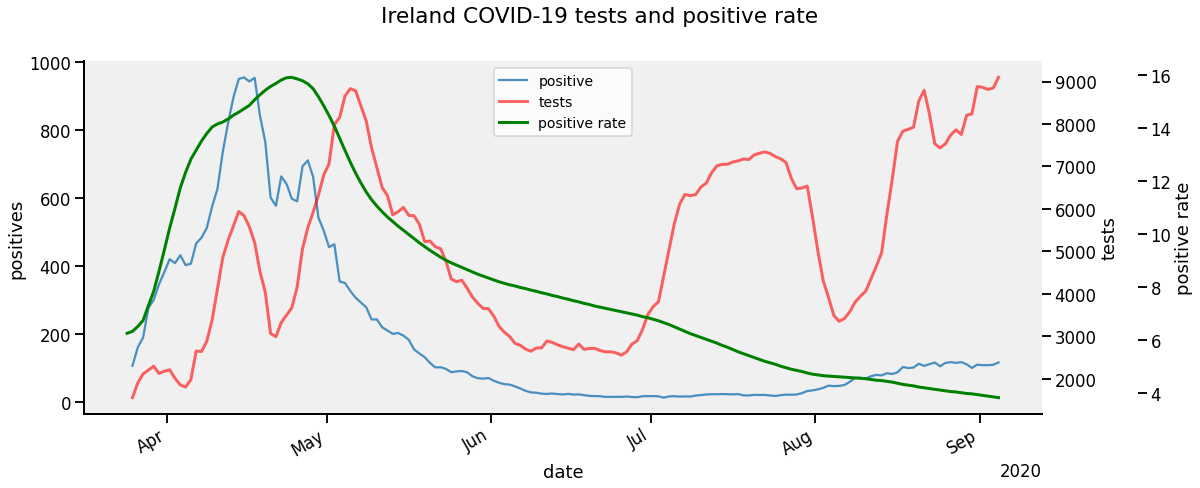

In [10]:
window=7
x=labs.set_index('date').rolling(window).mean()
f,ax=plt.subplots(figsize=(17,7))
l1=x.plot(y='Positive_diff',ax=ax,legend=False,alpha=.8)
ax1=ax.twinx()
x.plot(y='Tests_diff',ax=ax1,color='red',lw=3,legend=False,alpha=.6)
ax.set_ylabel('positives')
ax2=ax.twinx()
#ax2.axis('off')
ax1.set_ylabel('tests')
ax2.set_ylabel('positive rate')
ax2.spines["right"].set_position(("axes", 1.1))
ax.set_facecolor('#f0f0f0')
x.plot(y='PRate',ax=ax2,color='green',lw=3,legend=False)
ax.legend([ax.get_lines()[0],ax1.get_lines()[0],ax2.get_lines()[0]],['positive','tests','positive rate'],loc=9,fontsize=14)

f.suptitle('Ireland COVID-19 tests and positive rate')

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
sns.despine()
plt.tight_layout()
f.savefig('ireland_covid_tests_prate.jpg',dpi=150)

## Covid19CountyStatisticsHPSCIrelandOpenData

In [5]:
cs = pd.read_csv('http://opendata-geohive.hub.arcgis.com/datasets/d9be85b30d7748b5b7c09450b8aede63_0.csv?outSR={%22latestWkid%22:3857,%22wkid%22:102100}')
cs['time'] = pd.to_datetime(cs['TimeStamp'], infer_datetime_format=True)
cs = cs.sort_values(['CountyName','time'])
cs.columns

Index(['OBJECTID', 'ORIGID', 'CountyName', 'PopulationCensus16', 'TimeStamp',
       'IGEasting', 'IGNorthing', 'Lat', 'Long', 'UGI', 'ConfirmedCovidCases',
       'PopulationProportionCovidCases', 'ConfirmedCovidDeaths',
       'ConfirmedCovidRecovered', 'Shape__Area', 'Shape__Length', 'time'],
      dtype='object')

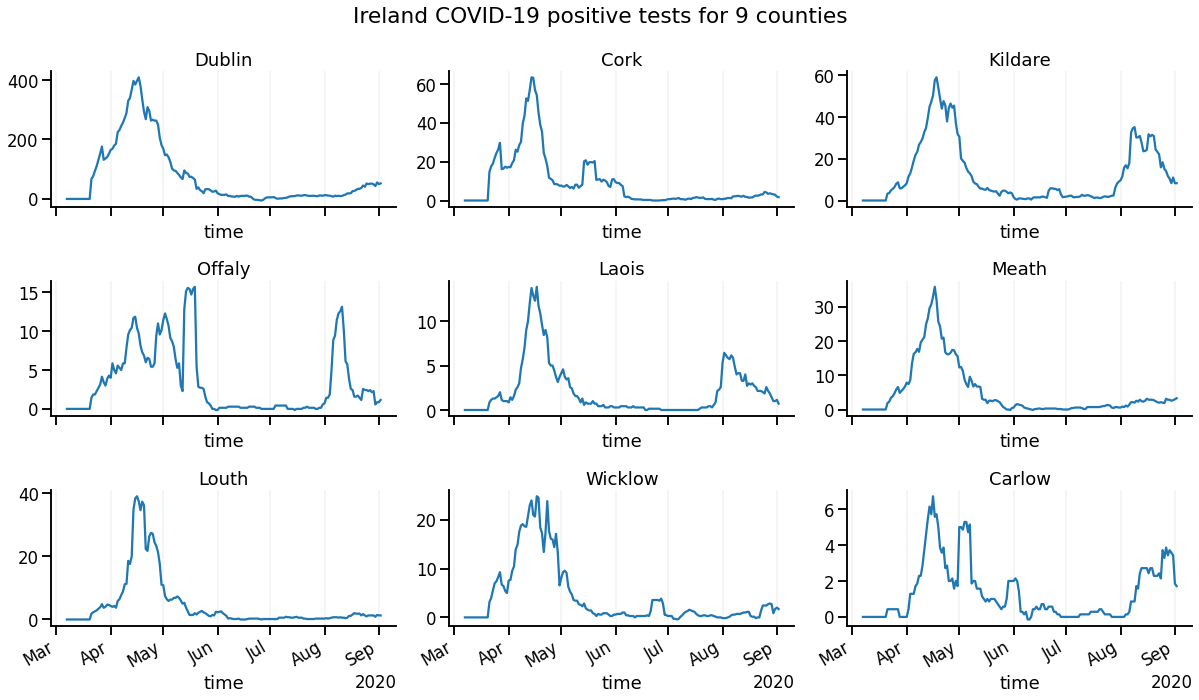

In [6]:
x=cs.set_index('time')#.rolling(window).mean()
f,ax=plt.subplots(3,3,figsize=(17,10))
axs=ax.flat
grouped = cs.groupby('CountyName')
i=0
for c in ['Dublin','Cork','Kildare','Offaly','Laois','Meath','Louth','Wicklow','Carlow']:
    ax=axs[i]
    x = cs[cs.CountyName==c].set_index('time').rolling(window).mean()
    x['cases'] = x['ConfirmedCovidCases'].diff() 
    x.plot(y='cases',ax=ax,legend=False)
    ax.set_title(c)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.grid(axis='x',color='0.95')
    #ax1=ax.twinx()
    x.plot(y='ConfirmedCovidDeaths',ax=ax1,legend=False,color='red')
    if i>5:
        ax.xaxis.set_major_formatter(formatter)
    else:
        ax.set_xticklabels([])
    i+=1
sns.despine()
f.suptitle('Ireland COVID-19 positive tests for 9 counties')
plt.tight_layout()
f.savefig('ireland_covid_tests_bycounty.jpg',dpi=150)


## single counties plot

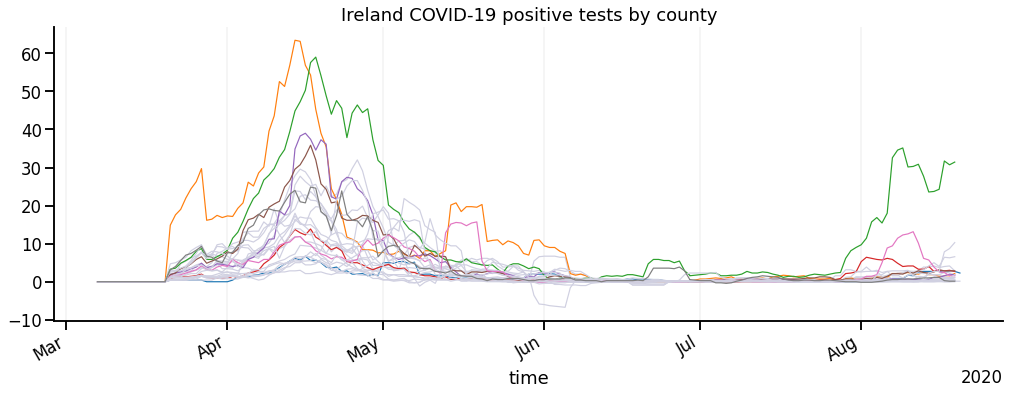

In [9]:
f,ax=plt.subplots(1,1,figsize=(17,6))
colors=sns.color_palette()
counties = cs.CountyName.unique()
selection = ['Dublin','Cork','Kildare','Offaly','Laois','Meath','Louth','Wicklow','Carlow']
i=0
lines=[]
for c in counties:
    x = cs[cs.CountyName==c].set_index('time').rolling(window).mean()
    x['cases'] = x['ConfirmedCovidCases'].diff()
    if c == 'Dublin':
        continue
    if c in selection:
        clr=colors[i]
        i+=1
    else:
        clr='#d0d0e1'
    a=x.plot(y='cases',ax=ax,legend=False,c=clr,lw=1.2)    
    
ax.set_title('Ireland COVID-19 positive tests by county')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.grid(axis='x',color='0.95')
#ax.legend(lines,selection,loc=9,fontsize=14)

sns.despine()


## CovidStatisticsProfileHPSCIrelandOpenData

In [49]:
daily = pd.read_csv('http://opendata-geohive.hub.arcgis.com/datasets/d8eb52d56273413b84b0187a4e9117be_0.csv?outSR={"latestWkid":3857,"wkid":102100}')
daily['date'] = pd.to_datetime(daily['Date'], infer_datetime_format=True)
daily['hospitalised_diff'] = daily.HospitalisedCovidCases.diff()

In [50]:
ds = daily.groupby('date').sum().rolling(window).mean().reset_index()

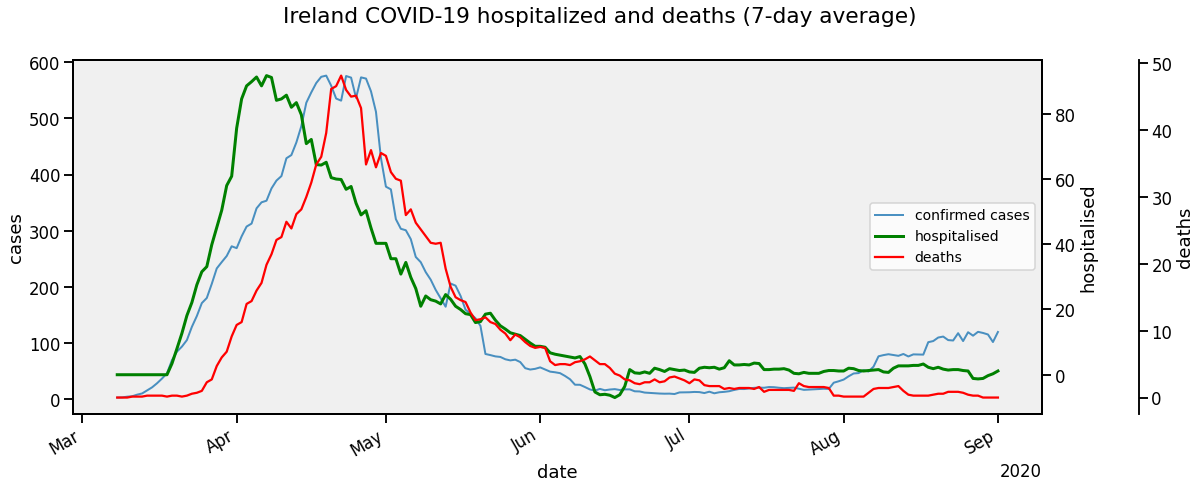

In [51]:
f,ax=plt.subplots(1,1,figsize=(17,7))
ds.plot(x='date',y='ConfirmedCovidCases',ax=ax,lw=2,legend=False,alpha=0.8)
ax1=ax.twinx()
ax2=ax.twinx()
ds.plot(x='date',y='hospitalised_diff',ax=ax1,lw=3,legend=False,color='green')
ds.plot(x='date',y='ConfirmedCovidDeaths',ax=ax2,legend=False,color='red')
ax2.spines["right"].set_position(("axes", 1.1))
ax.set_ylabel('cases')
ax1.set_ylabel('hospitalised')
ax2.set_ylabel('deaths')
ax.set_facecolor('#f0f0f0')
ax.xaxis.set_major_formatter(formatter)
ax.legend([ax.get_lines()[0],ax1.get_lines()[0],ax2.get_lines()[0]],['confirmed cases','hospitalised','deaths'],loc=5,fontsize=14)
f.suptitle('Ireland COVID-19 hospitalized and deaths (7-day average)')
plt.tight_layout()
f.savefig('ireland_covid_hosp_deaths.jpg',dpi=150)

In [ ]:
hosp = pd.read_csv('http://opendata-geohive.hub.arcgis.com/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0.csv?outSR={%22latestWkid%22:4326,%22wkid%22:4326}')

In [44]:
idf = gpd.read_file('map_data/Covid19CountyStatisticsHPSCIreland.shp')

In [48]:
time='2020-02-27'
g=idf[idf.TimeStamp==time]

In [ ]:
fig, ax = plt.subplots(1, figsize=(9,9))
g.plot(column='Population', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.2',legend=True)
ax.axis('off')

In [ ]:
idf